# **1. Import Library**

In [104]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, ConfusionMatrixDisplay


# **2. Memuat Dataset dari Hasil Clustering**

In [105]:
url = 'https://raw.githubusercontent.com/DickySaragih/Submission_BMLP/refs/heads/main/Dataset_clustering.csv'
df = pd.read_csv(url)

In [132]:
# Menampilkan 5 data teratas
print("Data Awal:")
print(df.head())

# Preprocessing sebelum split
if 'ID' in df.columns:
    df = df.drop(columns=['ID'])
df = pd.get_dummies(df)


Data Awal:
   TransactionAmount  CustomerAge  TransactionDuration  LoginAttempts  \
0              14.09           70                   81              1   
1             376.24           68                  141              1   
2             126.29           19                   56              1   
3             184.50           26                   25              1   
4              13.45           26                  198              1   

   AccountBalance  Cluster  TransactionID_TX000001  TransactionID_TX000002  \
0         5112.21        0                    True                   False   
1        13758.91        0                   False                    True   
2         1122.35        1                   False                   False   
3         8569.06        1                   False                   False   
4         7429.40        1                   False                   False   

   TransactionID_TX000003  TransactionID_TX000004  ...  \
0                   Fal

# **3. Data splitting**

In [107]:
# Splitting data (80% training, 20% testing)
x = df.drop(columns=["Cluster"])
y = df["Cluster"]

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

print("\nJumlah data training:", len(X_train))
print("Jumlah data testing:", len(X_test))



Jumlah data training: 2009
Jumlah data testing: 503


# **4. Membangun Model Klasifikasi**


## **a. Membangun Model Klasifikasi**
1. K-Nearest Neighbors (KNN)
2. Logistic regresion

In [124]:
# Melatih Model KNN data training
knn_model = KNeighborsClassifier(n_neighbors=2)
knn_model.fit(X_train, y_train)

y_train_pred = knn_model.predict(X_train)

accuracy_train = accuracy_score(y_train, y_train_pred)
f1_train = f1_score(y_train, y_train_pred, average='weighted')
conf_matrix_train = confusion_matrix(y_train,y_train_pred)


print("\nEvaluasi Model KNN pada Data Training:")
print(f"Akurasi: {accuracy_train}")
print(f"F1-score: {f1_train}")
print(f"Confusion Matrix:\n{conf_matrix_train}")



Evaluasi Model KNN pada Data Training:
Akurasi: 0.8795420607267297
F1-score: 0.8611004872235829
Confusion Matrix:
[[1270    0    0]
 [ 169  494    0]
 [  47   26    3]]


In [128]:

# Melatih Model Logistic Regression data training
logreg_model = LogisticRegression(random_state=42)

logreg_model.fit(X_train, y_train)

y_train_pred_logreg = logreg_model.predict(X_train)

accuracy_train_logreg = accuracy_score(y_train, y_train_pred_logreg)
f1_train_logreg = f1_score(y_train, y_train_pred_logreg, average='weighted')
conf_matrix_train_logreg = confusion_matrix(y_train, y_train_pred_logreg)

print("\nEvaluasi Model Logistic Regression pada Data Training:")
print(f"Akurasi: {accuracy_train_logreg}")
print(f"F1-score: {f1_train_logreg}")
print(f"Confusion Matrix:\n{conf_matrix_train_logreg}")


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



Evaluasi Model Logistic Regression pada Data Training:
Akurasi: 0.8073668491786958
F1-score: 0.7845861550181347
Confusion Matrix:
[[1208   62    0]
 [ 249  414    0]
 [  60   16    0]]


## **b. Evaluasi Model Klasifikasi**

In [129]:
# Melatih Model logistic Regresion data testing
y_pred_logreg = logreg_model.predict(X_test)

accuracy_test_logreg = accuracy_score(y_test, y_pred_logreg)
f1_test_logreg = f1_score(y_test, y_pred_logreg, average='weighted')
conf_matrix_test_logreg = confusion_matrix(y_test, y_pred_logreg)

print("\nEvaluasi Model Logistic Regression pada Data Testing:")
print(f"Akurasi: {accuracy_test_logreg}")
print(f"F1-score: {f1_test_logreg}")
print(f"Confusion Matrix:\n{conf_matrix_test_logreg}")



Evaluasi Model Logistic Regression pada Data Testing:
Akurasi: 0.8011928429423459
F1-score: 0.7794369559617002
Confusion Matrix:
[[298  20   0]
 [ 61 105   0]
 [ 12   7   0]]


In [130]:
# Melatih Model KNN data testing
y_pred_knn = knn_model.predict(X_test)

# Evaluasi model pada data testing
accuracy_test_knn = accuracy_score(y_test, y_pred_knn)
f1_test_knn = f1_score(y_test, y_pred_knn, average='weighted')
conf_matrix_test_knn = confusion_matrix(y_test, y_pred_knn)

print("\nEvaluasi Model KNN pada Data Testing:")
print(f"Akurasi: {accuracy_test_knn}")
print(f"F1-score: {f1_test_knn}")
print(f"Confusion Matrix:\n{conf_matrix_test_knn}")



Evaluasi Model KNN pada Data Testing:
Akurasi: 0.8011928429423459
F1-score: 0.7805862411081539
Confusion Matrix:
[[295  23   0]
 [ 58 108   0]
 [ 13   6   0]]


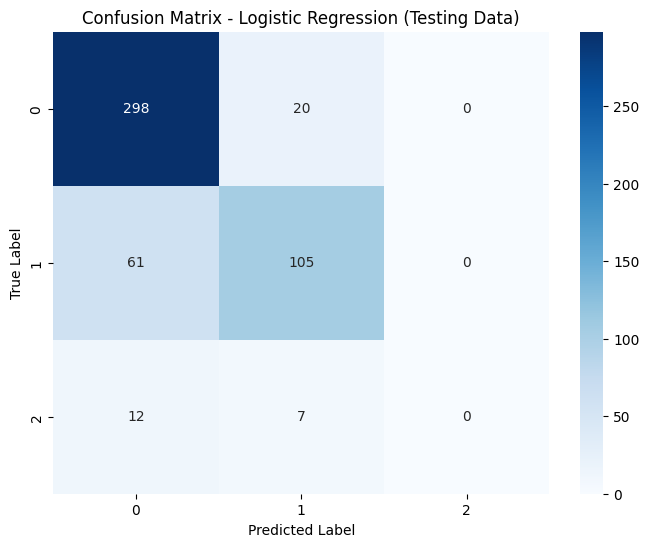

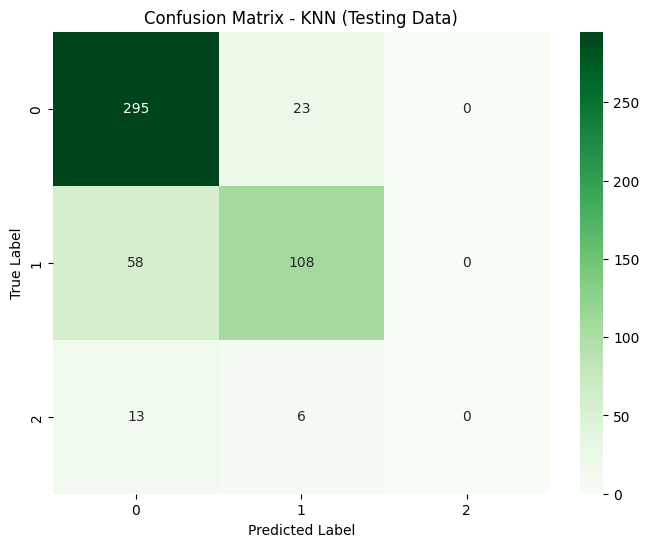

In [131]:
# Visualisasi Confusion Matrix untuk Logistic Regression
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_test_logreg, annot=True, fmt="d", cmap="Blues",
            xticklabels=logreg_model.classes_, yticklabels=logreg_model.classes_)
plt.title("Confusion Matrix - Logistic Regression (Testing Data)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Visualisasi Confusion Matrix untuk KNN
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_test_knn, annot=True, fmt="d", cmap="Greens",
            xticklabels=knn_model.classes_, yticklabels=knn_model.classes_)
plt.title("Confusion Matrix - KNN (Testing Data)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


## **e. Analisis Hasil Evaluasi Model Klasifikasi**

**Kesimpulan:**
- Berdasarkan hasil pengujian terhadap model Logistic Regression dan K-Nearest Neighbors (KNN), keduanya menunjukkan performa yang cukup baik dalam mengklasifikasikan data. Model Logistic Regression memiliki keunggulan dengan nilai akurasi dan F1-score yang sedikit lebih tinggi dibandingkan KNN pada data pengujian, meskipun selisihnya tidak terlalu signifikan. Visualisasi confusion matrix juga memberikan gambaran yang jelas mengenai jumlah prediksi yang benar dan salah pada masing-masing kelas, yang membantu dalam menganalisis efektivitas model secara lebih mendalam.

**Rekomendasi:**

1. Optimasi Parameter Model:
- Lakukan tuning parameter untuk model Logistic Regression dan KNN.
- Gunakan teknik seperti GridSearchCV atau RandomizedSearchCV untuk mencari parameter terbaik yang dapat meningkatkan performa model.
- Contoh: Untuk KNN, optimalkan nilai 'n_neighbors', dan untuk Logistic Regression, eksplorasi parameter seperti 'C', 'penalty', dan 'solver'.

2. Eksplorasi Model Lain:
- Coba model klasifikasi lain seperti Support Vector Machine (SVM), Decision Tree, Random Forest, atau Naive Bayes.
- Bandingkan kinerja model-model tersebut dengan Logistic Regression dan KNN untuk menemukan model terbaik.

3. Feature Engineering:
- Lakukan analisis lebih lanjut terhadap fitur-fitur yang ada.
- Pertimbangkan untuk membuat fitur baru atau mengubah representasi fitur yang ada untuk meningkatkan kinerja model.
- Teknik seperti Principal Component Analysis (PCA) dapat digunakan untuk reduksi dimensi jika terdapat banyak fitur.

4. Cross-Validation:
- Gunakan cross-validation (misalnya, k-fold cross-validation) untuk mendapatkan estimasi kinerja model yang lebih akurat dan robust.
- Hal ini membantu menghindari overfitting dan memberikan gambaran yang lebih baik tentang generalisasi model pada data yang belum terlihat.

5. Evaluasi Metrik Tambahan:
- Gunakan metrik evaluasi tambahan seperti precision, recall, dan AUC-ROC untuk memberikan pemahaman yang lebih komprehensif tentang kinerja model.
- Khususnya pada kasus data imbalance, perhatikan precision dan recall untuk masing-masing kelas.

